In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, color_map='viridis')# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.figdir = './figures/'
adata = sc.read("/media/ext5/renxi/projects/PLC_lab/cell2location_analysis/test/data/s_df.only_hepatocyte.h5ad")

import scvelo as scv
import loompy
import scanpy as sc
scv.logging.print_version()

#adata_non_hep = adata[adata.obs['cell_types'].isin(['Hepatocyte','CD8+ T Cell', 'CD3+ T cell', 'Macrophage', 'M2 Macrophage', 'Regulatory T Cell', 'Germinal Center B Cell', 'Lymphocyte'])]

-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.1
-----
PIL                 8.3.2
anndata             0.7.6
backcall            0.2.0
cached_property     1.5.2
cffi                1.14.6
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
decorator           5.1.1
dunamai             1.10.0
entrypoints         0.4
get_version         3.2
h5py                3.1.0
ipykernel           5.5.6
ipython_genutils    0.2.0
jedi                0.17.2
joblib              1.1.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0
llvmlite            0.34.0
loompy              3.0.7
matplotlib          3.3.4
mpl_toolkits        NA
natsort             8.1.0
numba               0.51.2
numexpr             2.7.3
numpy               1.19.5
numpy_groupies      0.9.14
packaging           21.3
pandas              1.1.5
parso               0.7.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.28
pty

In [3]:
adata

AnnData object with n_obs × n_vars = 22277 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'integrated_snn_res.0.2', 'seurat_clusters', 'cell_types', 'ISG_score', 'hepatocyte_types', 'ident'
    uns: 'X_name'
    layers: 'logcounts'

Normalized count data: X.


extracting highly variable genes


Logarithmized X.


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


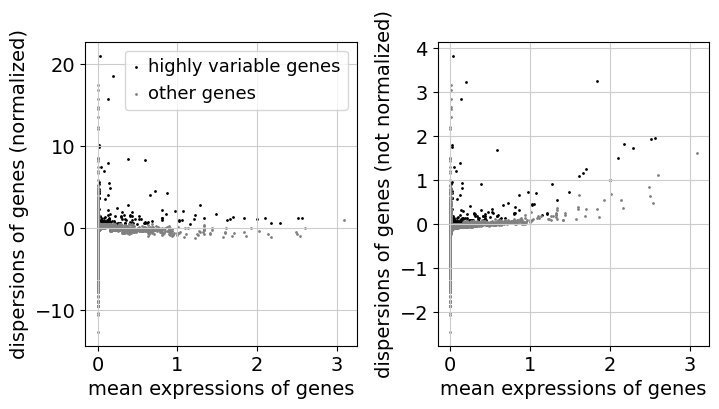

In [4]:
scv.pp.filter_and_normalize(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)


regressing out ['nCount_RNA', 'percent.mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:05)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)


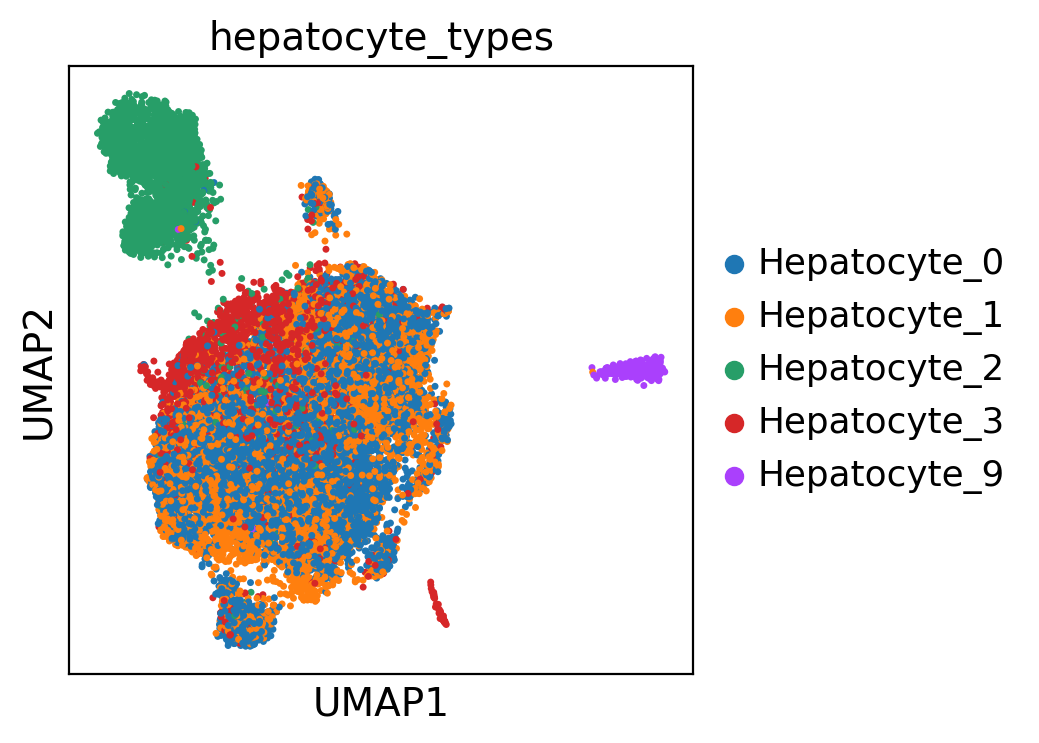

In [5]:

adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['nCount_RNA', 'percent.mito'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(adata, min_dist = 0.3, spread = 1)

sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.pl.umap(adata, color='hepatocyte_types',size=25, save='_umap.png')


In [6]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

adata1 = adata[adata.obs["orig.ident"] == "1"]
adata2 = adata[adata.obs["orig.ident"] == "2"]
adata3 = adata[adata.obs["orig.ident"] == "3"]

ldata1 = scv.read('/home/renxi/A-Batch2-AK22875-AK31743_possorted_genome_bam_7VKNY.loom', cache = True)
ldata2 = scv.read('/home/renxi/B-Batch2-AK22874-AK32699_possorted_genome_bam_FU9Y3.loom', cache = True)
ldata3 = scv.read('/home/renxi/C-Batch2-AK5503-AK32700_possorted_genome_bam_7V4XV.loom', cache = True)

... reading from cache file cache/home-renxi-A-Batch2-AK22875-AK31743_possorted_genome_bam_7VKNY.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/home-renxi-B-Batch2-AK22874-AK32699_possorted_genome_bam_FU9Y3.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/home-renxi-C-Batch2-AK5503-AK32700_possorted_genome_bam_7V4XV.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [7]:
ldata1.var_names_make_unique()
ldata1.obs_names_make_unique()
ldata2.var_names_make_unique()
ldata2.obs_names_make_unique()
ldata3.var_names_make_unique()
ldata3.obs_names_make_unique()

In [8]:
adata1 = scv.utils.merge(adata1, ldata1)
adata2 = scv.utils.merge(adata2, ldata2)
adata3 = scv.utils.merge(adata3, ldata3)

In [9]:
adata3

AnnData object with n_obs × n_vars = 7002 × 162
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'integrated_snn_res.0.2', 'seurat_clusters', 'cell_types', 'ISG_score', 'hepatocyte_types', 'ident', 'initial_size', 'n_counts', 'initial_size_spliced', 'initial_size_unspliced'
    var: 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'X_name', 'hvg', 'pca', 'neighbors', 'umap', 'hepatocyte_types_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'logcounts', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

Abundance of ['spliced', 'unspliced']: [0.88 0.12]


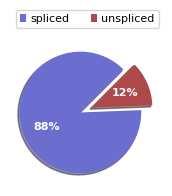

Abundance of ['spliced', 'unspliced']: [0.88 0.12]


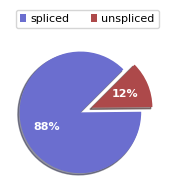

Abundance of ['spliced', 'unspliced']: [0.85 0.15]


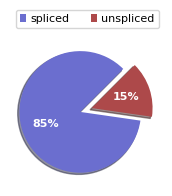

In [10]:
scv.utils.show_proportions(adata1)
scv.pl.proportions(adata1)
scv.utils.show_proportions(adata2)
scv.pl.proportions(adata2)
scv.utils.show_proportions(adata3)
scv.pl.proportions(adata3)

In [11]:

scv.pp.filter_and_normalize(adata1)
scv.pp.neighbors(adata1)
scv.pp.moments(adata1)


scv.pp.filter_and_normalize(adata2)
scv.pp.neighbors(adata2)
scv.pp.moments(adata2)


scv.pp.filter_and_normalize(adata3)
scv.pp.neighbors(adata3)
scv.pp.moments(adata3)



Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [12]:
scv.tl.velocity(adata1)
scv.tl.velocity(adata2)
scv.tl.velocity(adata3)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [13]:
scv.tl.velocity_graph(adata1)
scv.tl.velocity_graph(adata2)
scv.tl.velocity_graph(adata3)

computing velocity graph (using 1/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/128 cores)
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/128 cores)
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [14]:
adata3

AnnData object with n_obs × n_vars = 7002 × 162
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'integrated_snn_res.0.2', 'seurat_clusters', 'cell_types', 'ISG_score', 'hepatocyte_types', 'ident', 'initial_size', 'n_counts', 'initial_size_spliced', 'initial_size_unspliced', 'velocity_self_transition'
    var: 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'X_name', 'hvg', 'pca', 'neighbors', 'umap', 'hepatocyte_types_colors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'logcounts', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


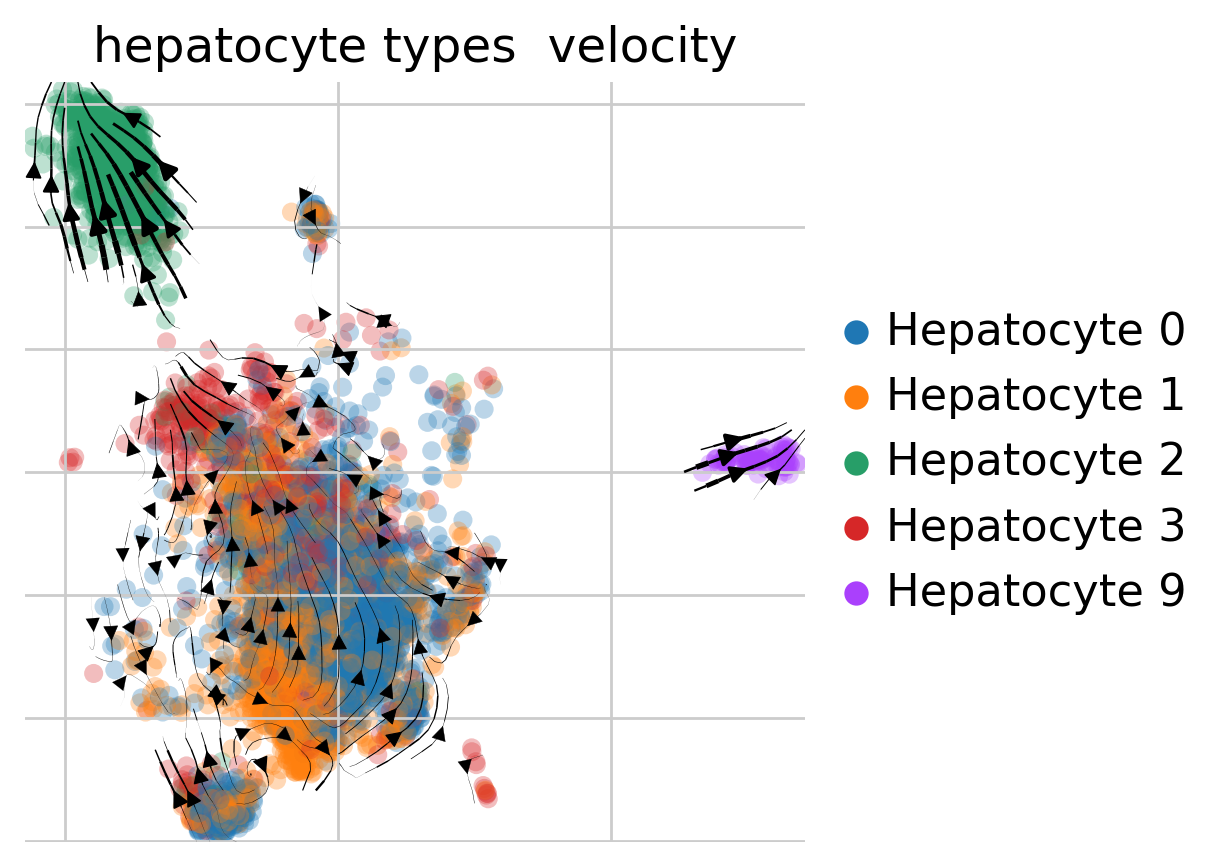

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


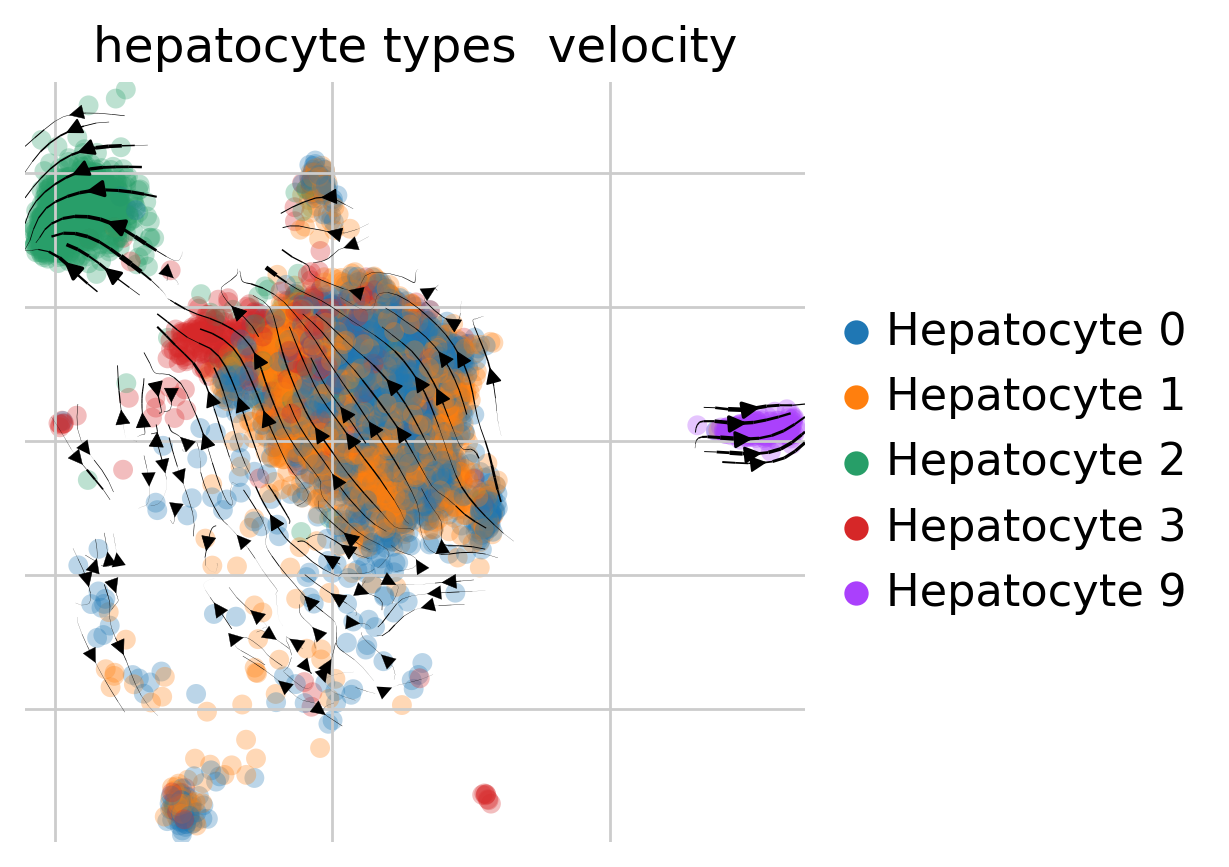

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


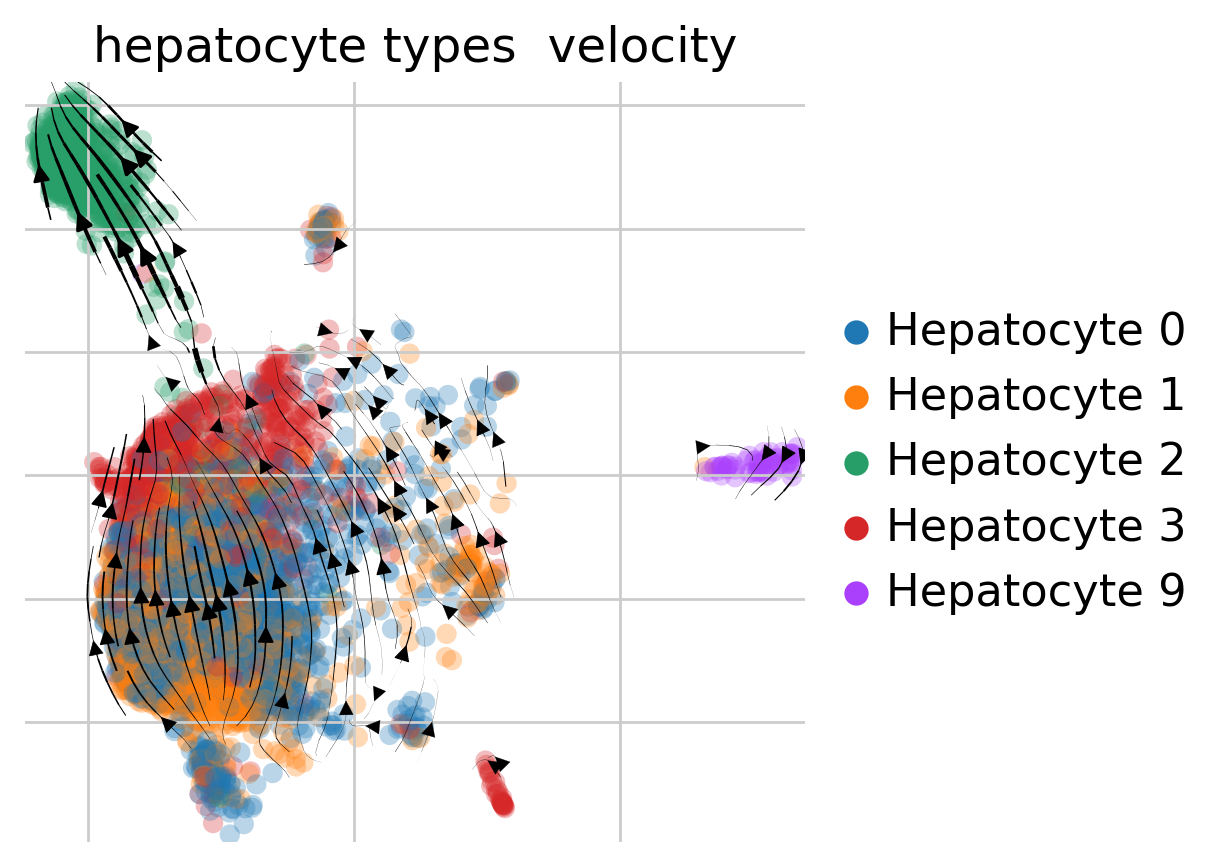

In [15]:
scv.pl.velocity_embedding_stream(adata1, layer=['velocity'], color=['hepatocyte_types'],
                               dpi = 250, use_raw = True, legend_loc = 'right margin')
scv.pl.velocity_embedding_stream(adata2, layer=['velocity'], color=['hepatocyte_types'],
                               dpi = 250, use_raw = True, legend_loc = 'right margin')
scv.pl.velocity_embedding_stream(adata3, layer=['velocity'], color=['hepatocyte_types'],
                               dpi = 250, use_raw = True, legend_loc = 'right margin')


--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


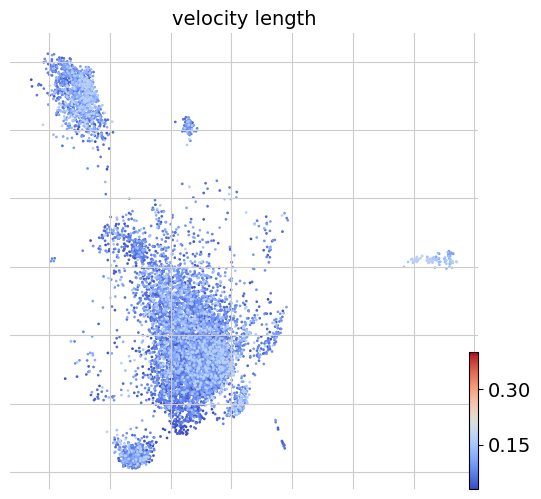

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


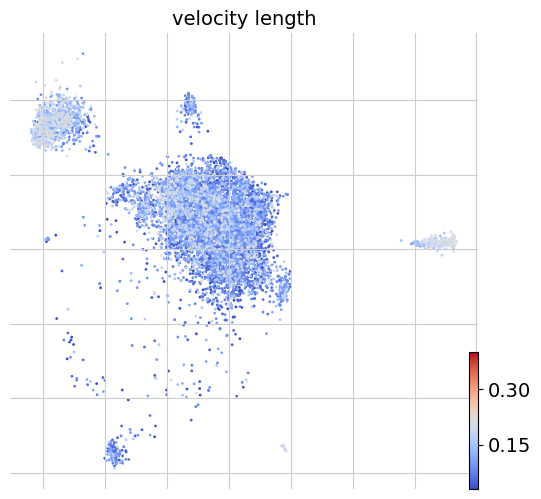

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


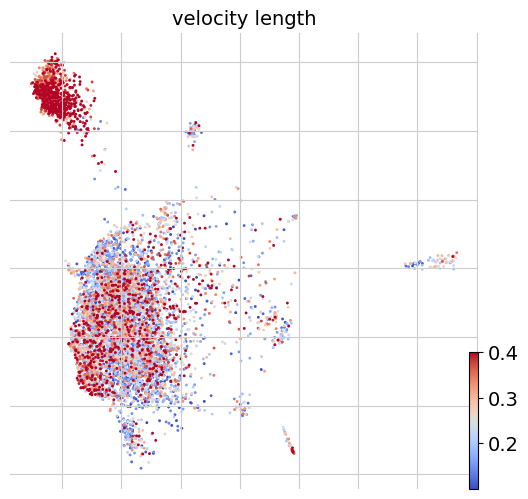

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


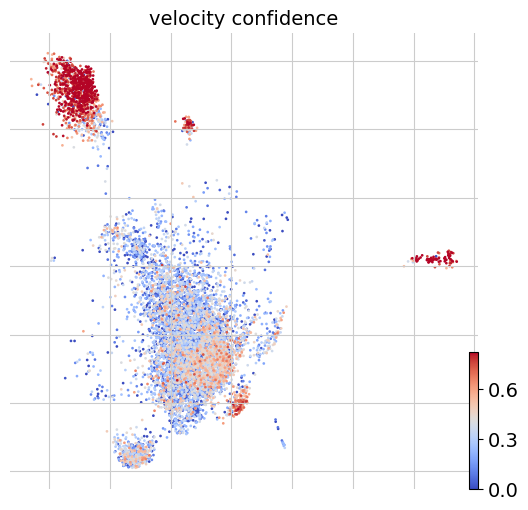

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


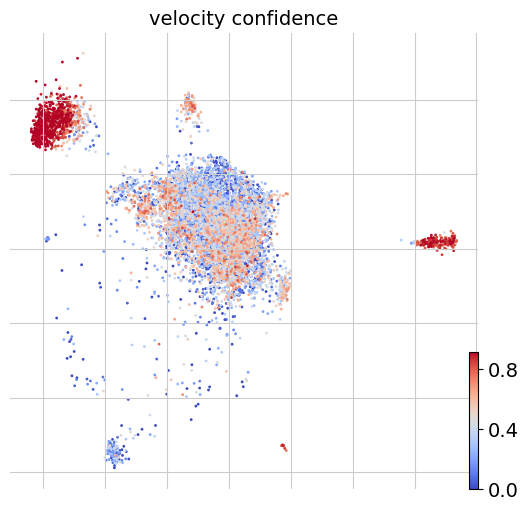

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)


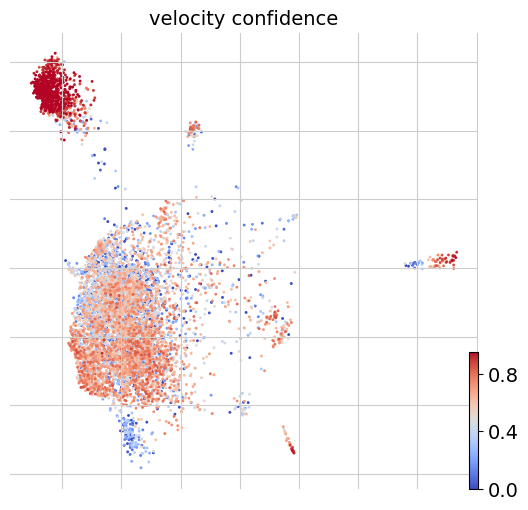

In [41]:
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
scv.tl.velocity_confidence(adata1)
keys = 'velocity_length'
scv.pl.scatter(adata1, c=keys,cmap='coolwarm', perc=[5, 95], vmax=0.4)
scv.tl.velocity_confidence(adata2)
keys = 'velocity_length'
scv.pl.scatter(adata2, c=keys,cmap='coolwarm', perc=[5, 95], vmax=0.4)
scv.tl.velocity_confidence(adata3)
keys = 'velocity_length'
scv.pl.scatter(adata3, c=keys,cmap='coolwarm', perc=[5, 95], vmax=0.4)

scv.tl.velocity_confidence(adata1)
keys = 'velocity_confidence'
scv.pl.scatter(adata1, c=keys,cmap='coolwarm', perc=[5, 95])
scv.tl.velocity_confidence(adata2)
keys = 'velocity_confidence'
scv.pl.scatter(adata2, c=keys,cmap='coolwarm', perc=[5, 95])
scv.tl.velocity_confidence(adata3)
keys = 'velocity_confidence'
scv.pl.scatter(adata3, c=keys,cmap='coolwarm', perc=[5, 95])


Trying to set attribute `.obs` of view, copying.
ranking genes
... storing 'spliced_groups' as categorical
    finished: added to `.uns['spliced_group_DE_results']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


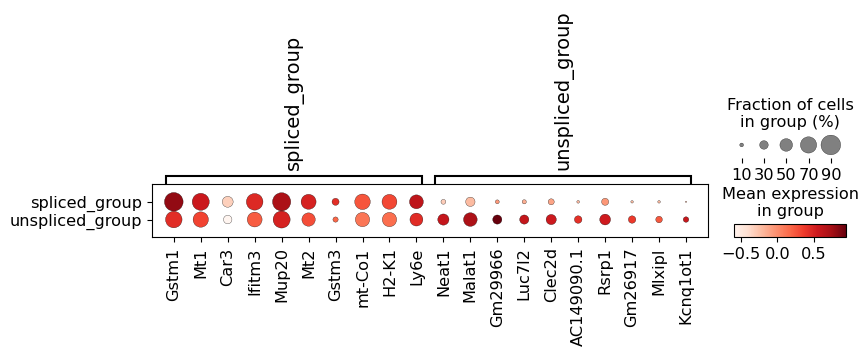

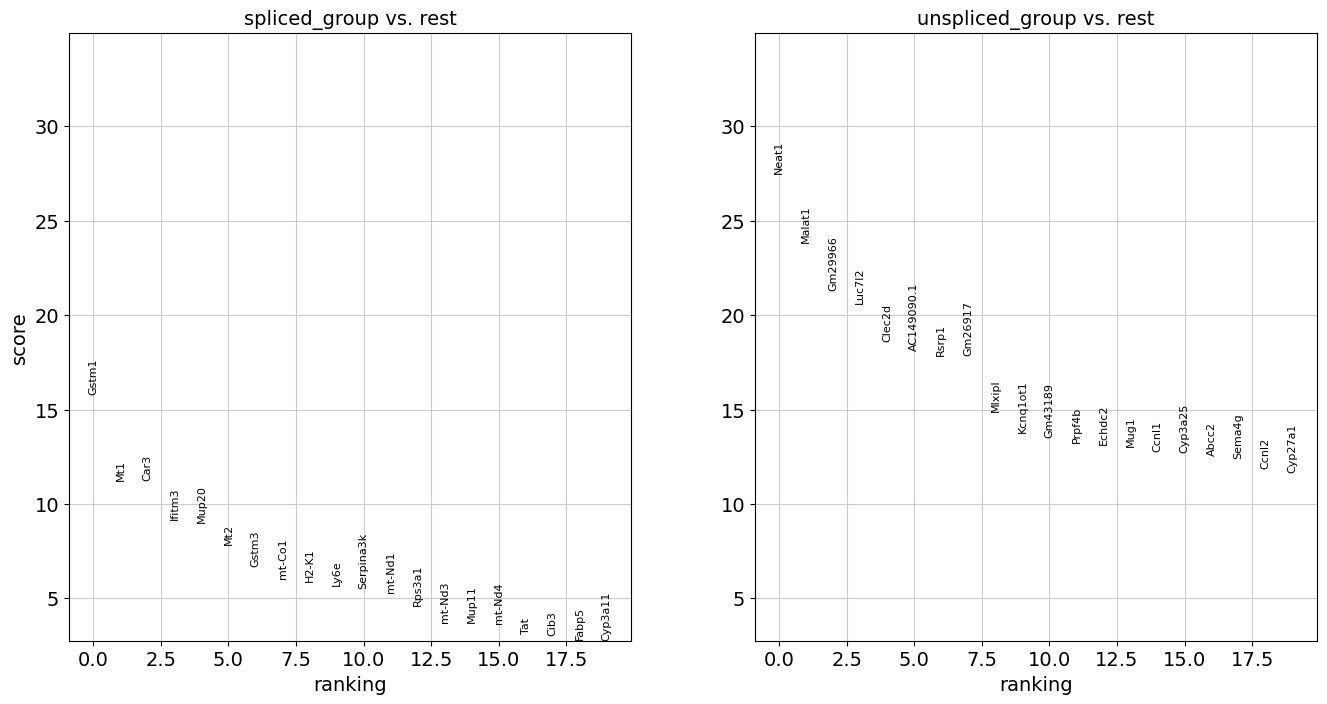

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_spliced_groups']`


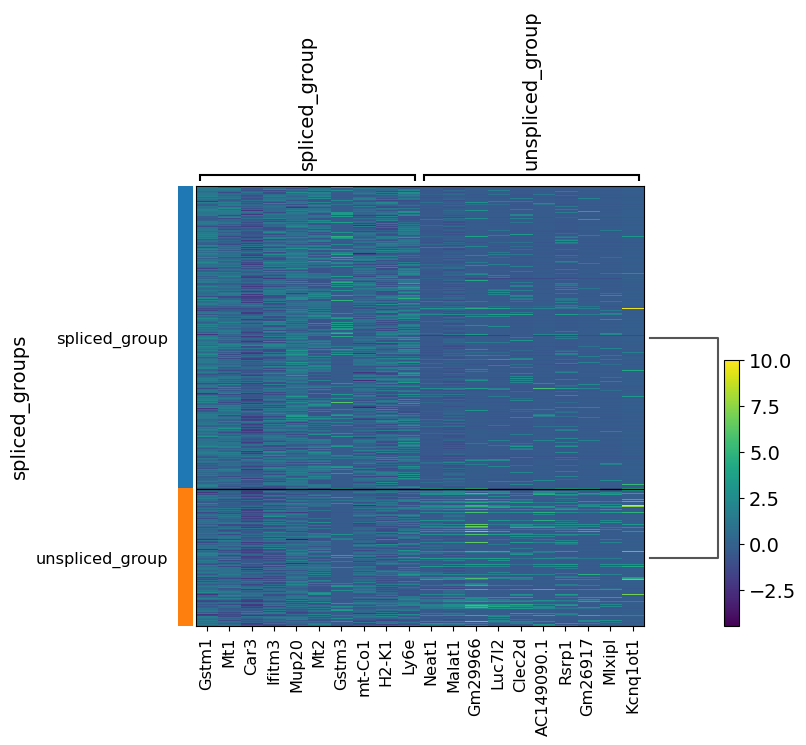

In [38]:
adata3_hepa = adata3[adata3.obs["cell_types"] == "Hepatocyte"]

adata3_hepa.obs['spliced_groups'] = ['spliced_group' if i < 0.3 else 'unspliced_group' for i in adata3_hepa.obs['velocity_length']]
sc.tl.rank_genes_groups(adata3_hepa, groupby='spliced_groups', key_added='spliced_group_DE_results', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata3_hepa, key='spliced_group_DE_results')
sc.pl.rank_genes_groups(adata3_hepa, key='spliced_group_DE_results')
sc.pl.rank_genes_groups_heatmap(adata3_hepa, key="spliced_group_DE_results", show_gene_labels=True)

Trying to set attribute `.obs` of view, copying.
ranking genes
... storing 'spliced_groups' as categorical
    finished: added to `.uns['spliced_group_DE_results']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_spliced_groups']`


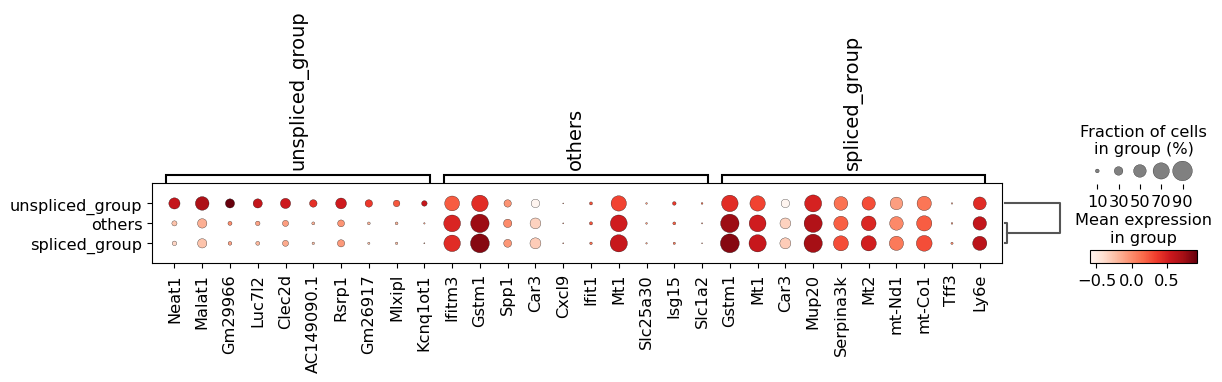

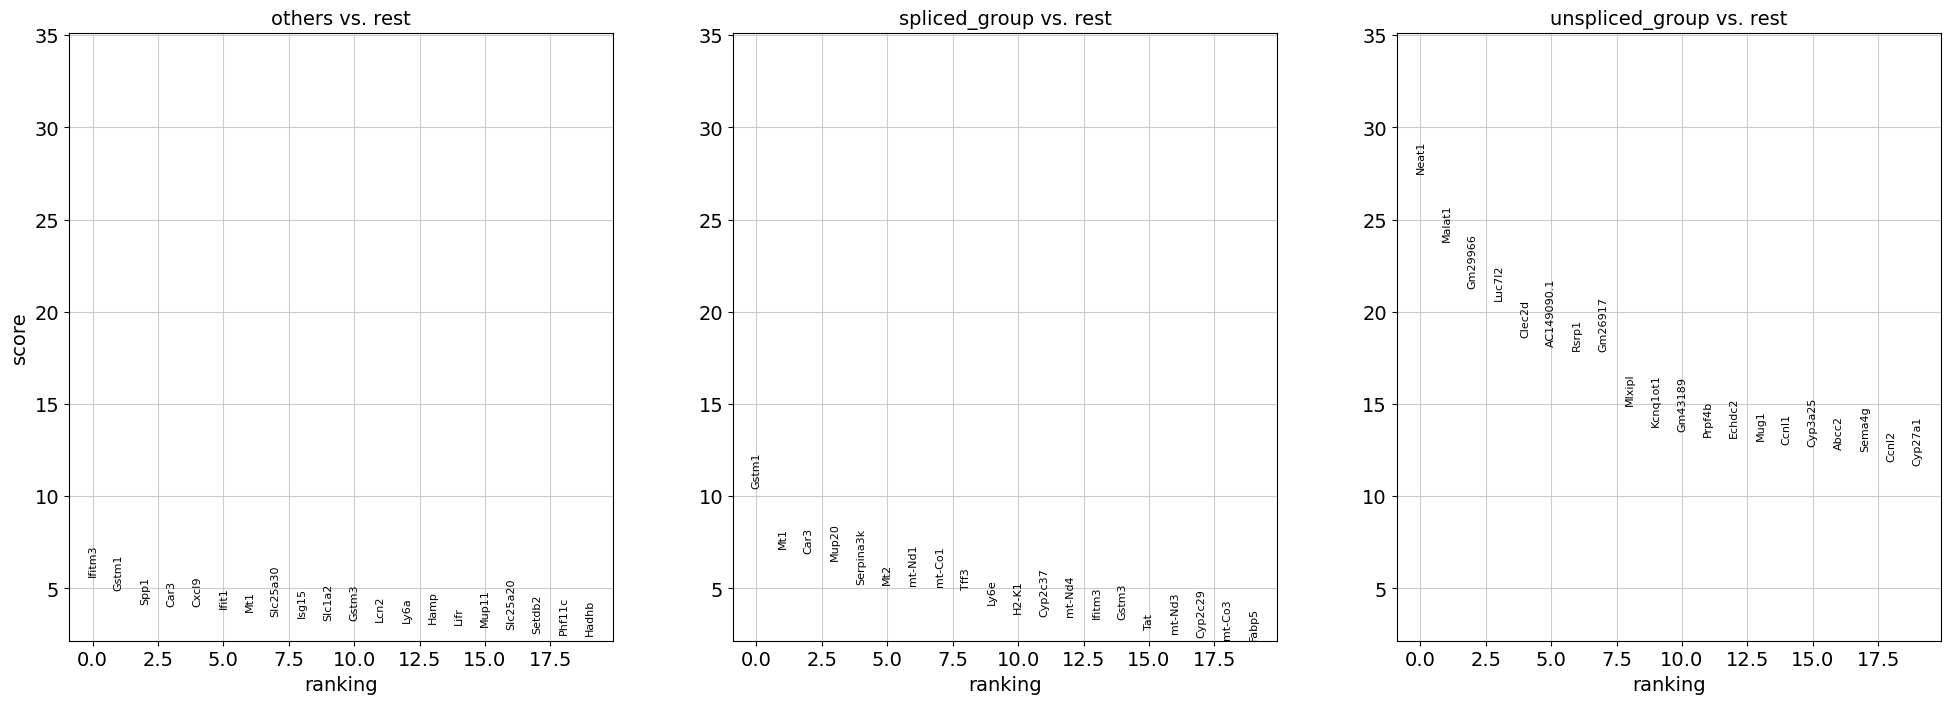

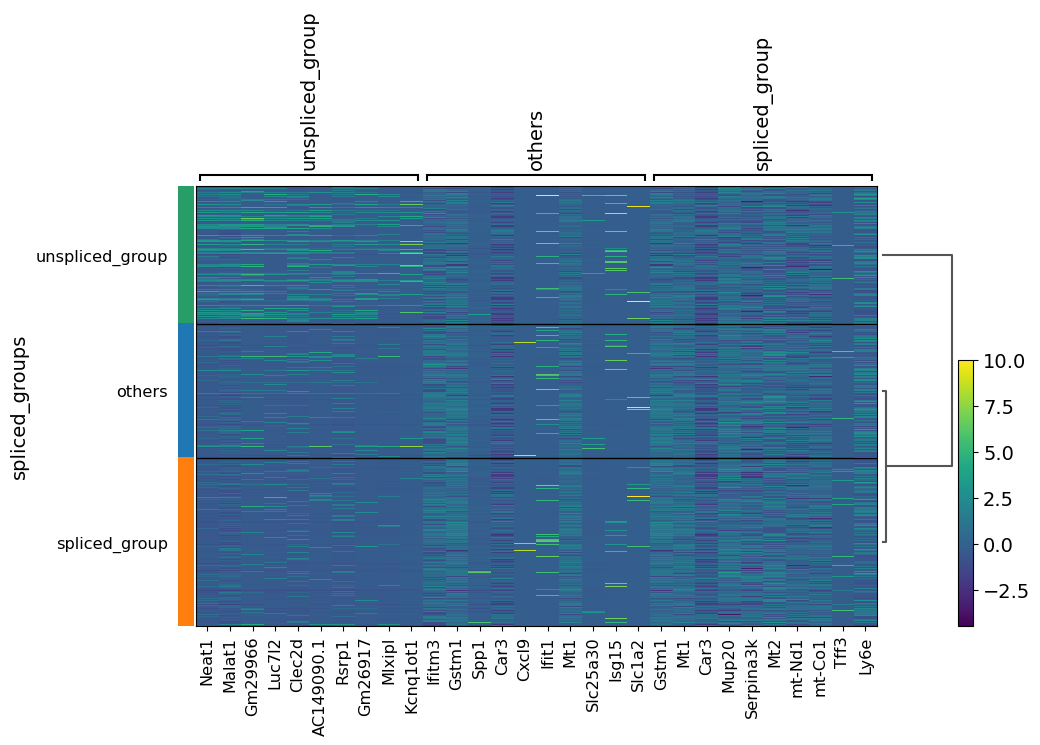

In [37]:
adata3_hepa = adata3[adata3.obs["cell_types"] == "Hepatocyte"]

adata3_hepa.obs['spliced_groups'] = ['spliced_group' if i < 0.2 else 'unspliced_group' if i > 0.3 else "others" for i in adata3_hepa.obs['velocity_length']]
sc.tl.rank_genes_groups(adata3_hepa, groupby='spliced_groups', key_added='spliced_group_DE_results', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata3_hepa, key='spliced_group_DE_results')
sc.pl.rank_genes_groups(adata3_hepa, key='spliced_group_DE_results')
sc.pl.rank_genes_groups_heatmap(adata3_hepa, key="spliced_group_DE_results", show_gene_labels=True)

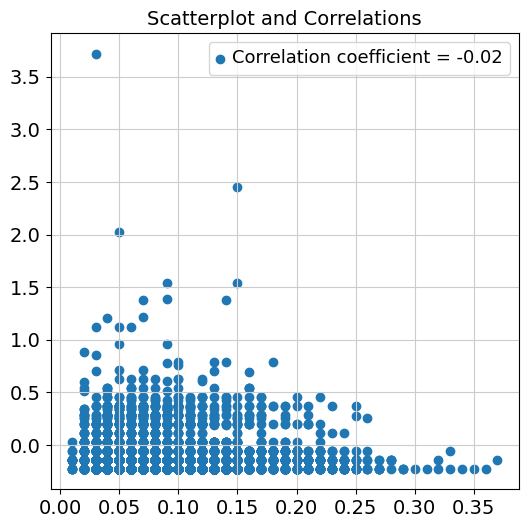

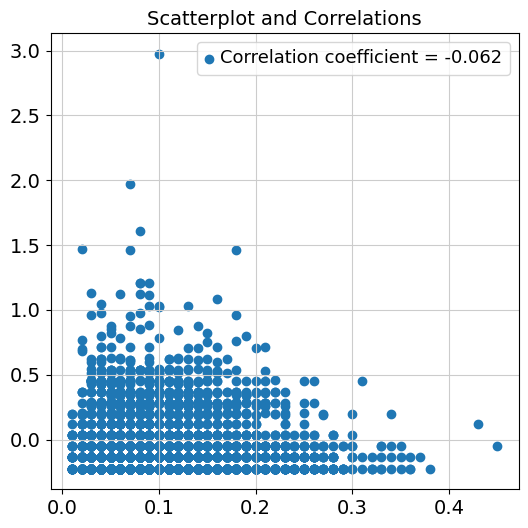

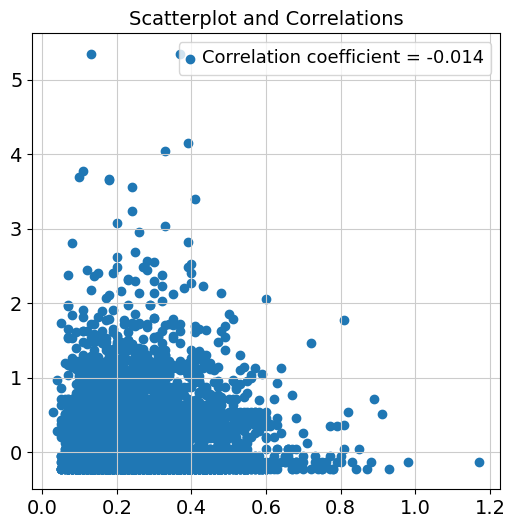

In [45]:
#import seaborn as sns
#sns.lmplot(x="velocity_length", y="ISG_score", data=adata3_hepa.obs);
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(adata1.obs['velocity_length'], adata1.obs['ISG_score'], label="Correlation coefficient = " + str(np.round(np.corrcoef(adata1.obs['velocity_length'], adata1.obs['ISG_score'])[0,1], 3)))
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(adata2.obs['velocity_length'], adata2.obs['ISG_score'], label="Correlation coefficient = " + str(np.round(np.corrcoef(adata2.obs['velocity_length'], adata2.obs['ISG_score'])[0,1], 3)))
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
plt.scatter(adata3.obs['velocity_length'], adata3.obs['ISG_score'], label="Correlation coefficient = " + str(np.round(np.corrcoef(adata3.obs['velocity_length'], adata3.obs['ISG_score'])[0,1], 3)))
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()


In [20]:
adata3_hepa.obs['spliced_groups'].value_counts()
#adata3_hepa.obs['ISG_groups']


spliced_group      4718
unspliced_group    2284
Name: spliced_groups, dtype: int64

Trying to set attribute `.obs` of view, copying.
ranking genes
... storing 'ISG_groups' as categorical
    finished: added to `.uns['ISG_group_DE_results']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


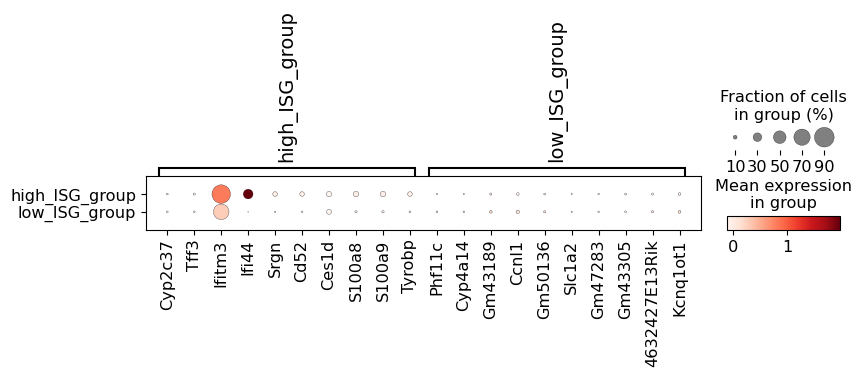

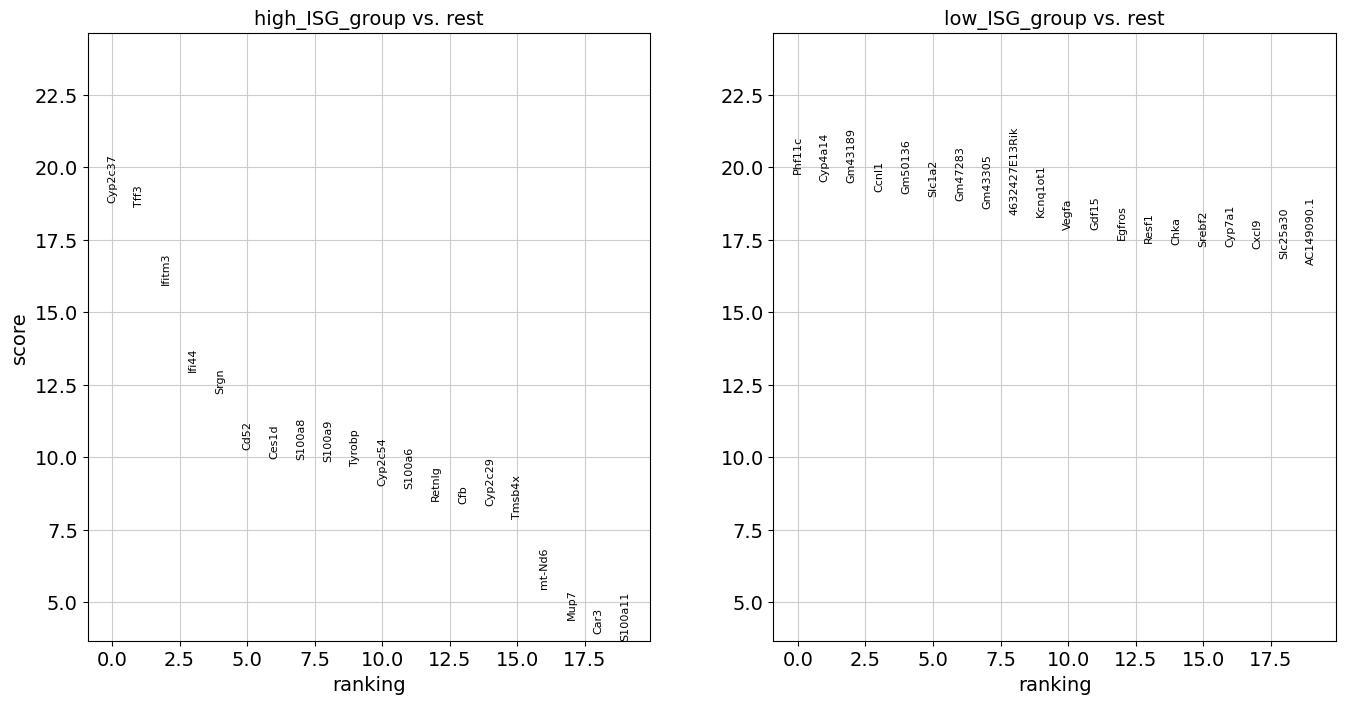

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_ISG_groups']`


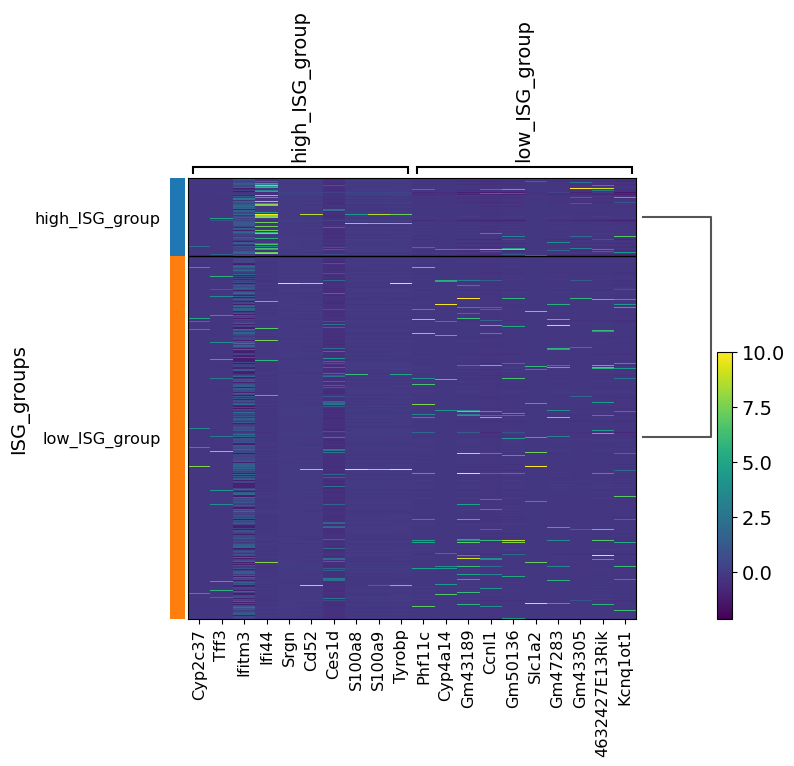

In [21]:
adata3_hepa = adata3[adata3.obs["cell_types"] == "Hepatocyte"]

adata3_hepa.obs['ISG_groups'] = ['low_ISG_group' if i < 0.5 else 'high_ISG_group' for i in adata3_hepa.obs['ISG_score']]
sc.tl.rank_genes_groups(adata3_hepa, groupby='ISG_groups', key_added='ISG_group_DE_results', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata3_hepa, key='ISG_group_DE_results')
sc.pl.rank_genes_groups(adata3_hepa, key='ISG_group_DE_results')
sc.pl.rank_genes_groups_heatmap(adata3_hepa, key="ISG_group_DE_results", show_gene_labels=True)

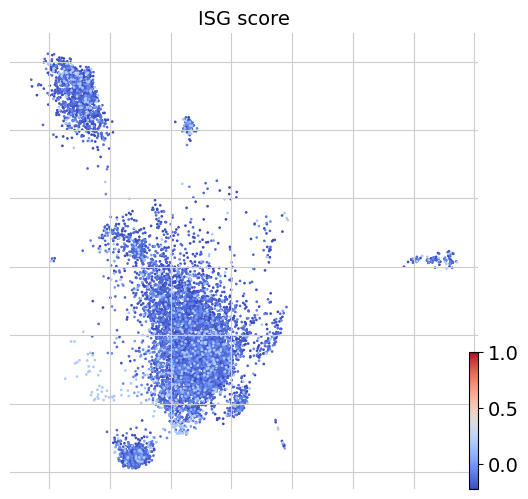

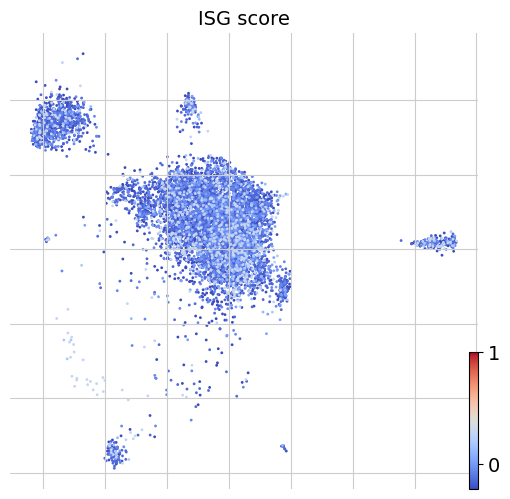

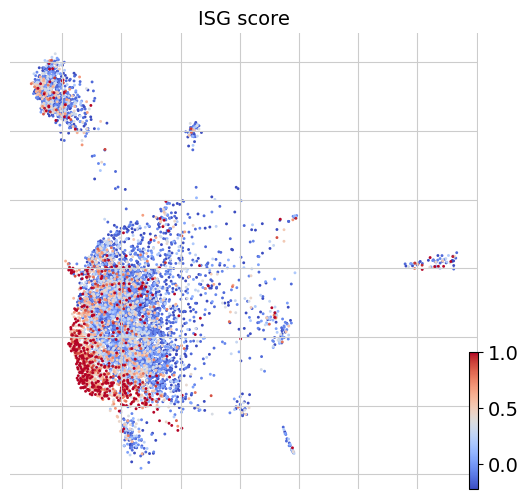

In [44]:
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})
scv.pl.scatter(adata1, c='ISG_score',cmap='coolwarm', perc=[5, 95], vmax = 1)
scv.pl.scatter(adata2, c='ISG_score',cmap='coolwarm', perc=[5, 95], vmax = 1)
scv.pl.scatter(adata3, c='ISG_score',cmap='coolwarm', perc=[5, 95], vmax = 1)

In [23]:
adata1


AnnData object with n_obs × n_vars = 7950 × 162
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.ribo', 'integrated_snn_res.0.2', 'seurat_clusters', 'cell_types', 'ISG_score', 'hepatocyte_types', 'ident', 'initial_size', 'n_counts', 'initial_size_spliced', 'initial_size_unspliced', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_count_corr', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'X_name', 'hvg', 'pca', 'neighbors', 'umap', 'hepatocyte_types_colors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'logcounts', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivitie

In [24]:
##Gene set enrichment analysis
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy
import matplotlib.pyplot as plt
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(organism='Mouse')
print(gene_set_names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease_Perturbations_from_GEO_up', 'Disease_Signatures

In [25]:
#?gseapy.enrichr
adata3_hepa = adata3[adata3.obs["cell_types"] == "Hepatocyte"]

adata3_hepa.obs['spliced_groups'] = ['spliced_group' if i < 0.5 else 'unspliced_group' for i in adata3_hepa.obs['velocity_length']]
sc.tl.rank_genes_groups(adata3_hepa, groupby='spliced_groups', key_added='spliced_group_DE_results', method='wilcoxon')
#glist = sc.get.rank_genes_groups_df(adata3_hepa, group='unspliced_group', key="spliced_group_DE_results")['names'].squeeze().str.strip().tolist()
glist = sc.get.rank_genes_groups_df(adata3_hepa, group='unspliced_group', key="spliced_group_DE_results",
                                    log2fc_min=0, 
                                    pval_cutoff=0.01)['names'].squeeze().str.strip().tolist()

print(len(glist))

Trying to set attribute `.obs` of view, copying.
ranking genes
... storing 'spliced_groups' as categorical
    finished: added to `.uns['spliced_group_DE_results']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


65


In [26]:
#adata3_hepa.uns['spliced_group_DE_results'].to_csv('/home/renxi/DEG_list_unspliced_and_spliced_genes_in_hepatocyte.csv', index = False, header=True)
#sc.get.rank_genes_groups_df(adata3_hepa, group='spliced_group', key="spliced_group_DE_results").to_csv('/home/renxi/DEG_list_spliced_genes_in_hepatocyte.csv', index = False, header=True)
adata3_hepa.obs['spliced_groups'].to_csv('/home/renxi/cell_list_of_spliced_and_unspliced_groups_in_hepatocyte.csv', index = True, header=True)

In [27]:
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Mouse',
                     #gene_sets='GO_Biological_Process_2021',
                     #gene_sets='KEGG_2019_Mouse',
                     #gene_sets='Reactome_2016',
                     gene_sets='WikiPathways_2019_Mouse',
                     description='pathway',
                     cutoff = 0.5)
enr_res.results.head(8)
#enr_res.results.to_csv('/home/renxi/gene_set_pathway_for_unspliced_genes_in_hepatocyte.csv', index = False, header=True)

Gene_set                                               Term  \
0  WikiPathways_2019_Mouse                        Amino Acid metabolism WP662   
1  WikiPathways_2019_Mouse  Eicosanoid metabolism via Cytochrome P450 Mono...   
2  WikiPathways_2019_Mouse  Nuclear receptors in lipid metabolism and toxi...   
3  WikiPathways_2019_Mouse                       TYROBP Causal Network WP3625   
4  WikiPathways_2019_Mouse                           Irinotecan Pathway WP475   
5  WikiPathways_2019_Mouse                          Macrophage markers WP2271   
6  WikiPathways_2019_Mouse                                   Osteoclast WP454   
7  WikiPathways_2019_Mouse                            Iron Homeostasis WP1596   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0    4/95  0.000259          0.008032            0                     0   
1    2/16  0.001212          0.018784            0                     0   
2    2/30  0.004266          0.044085            0                     0   
3    2/58  0.015294          0.118526            0                     0   
4    1/10  0.032036          0.165518            0                     0   
5    1/10  0.032036          0.165518            0                     0   
6    1/14  0.044565          0.184731            0                     0   
7    1/15  0.047672          0.184731            0                     0   

   Odds Ratio  Combined Score             Genes  
0   14.299406      118.089777  SDS;OAT;TAT;GLUL  
1   45.172336      303.358238   CYP2C37;CYP4A10  
2   22.570295      123.166346       ABCC2;NR1I3  
3   11.269274       47.109087       TYROBP;SPP1  
4   34.593750      119.033792             ABCC2  
5   34.593750      119.033792              CD52  
6   23.944712       74.487282              SPP1  
7   22.233259       67.664721             HAMP2

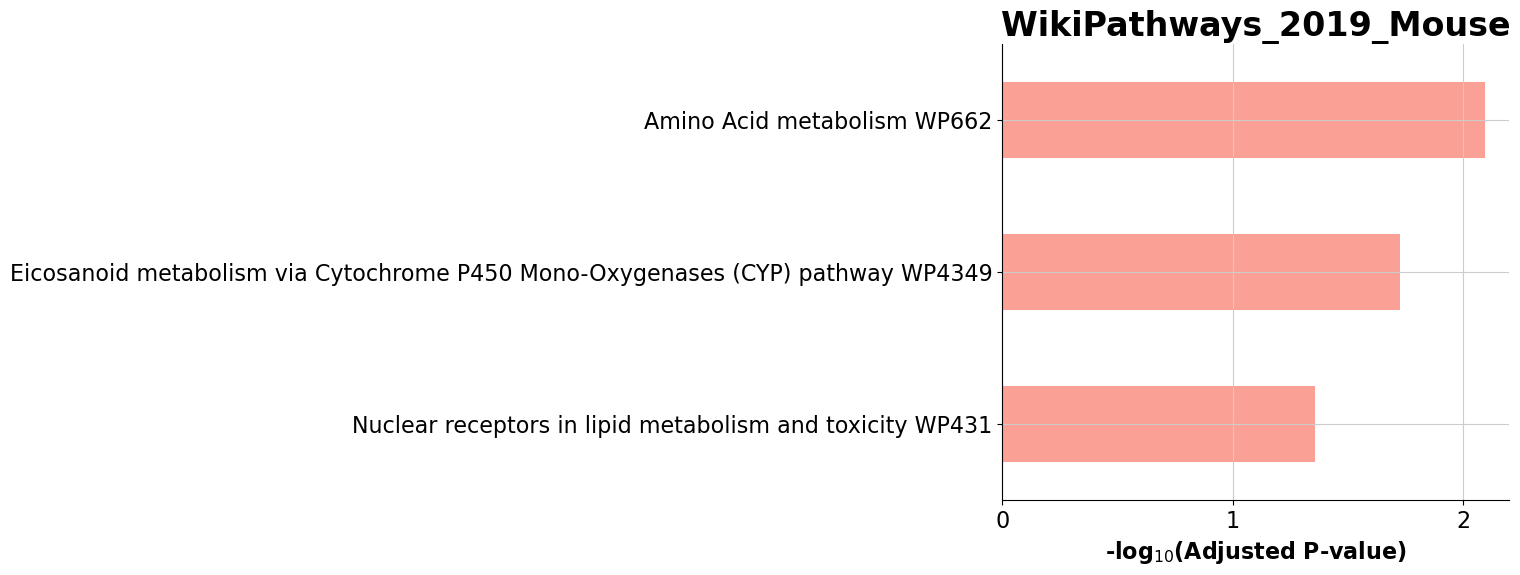

In [28]:
gseapy.barplot(enr_res.res2d,title='WikiPathways_2019_Mouse')

In [29]:
scv.tl.rank_velocity_genes(adata3, groupby='cell_types', min_corr=.3)

df = scv.DataFrame(adata3.uns['rank_velocity_genes']['names'])
df.head(20)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


Hepatocyte
0     Slc7a2
1   Slc39a14
2     Egfros
3         C3
4    Cyp2c29

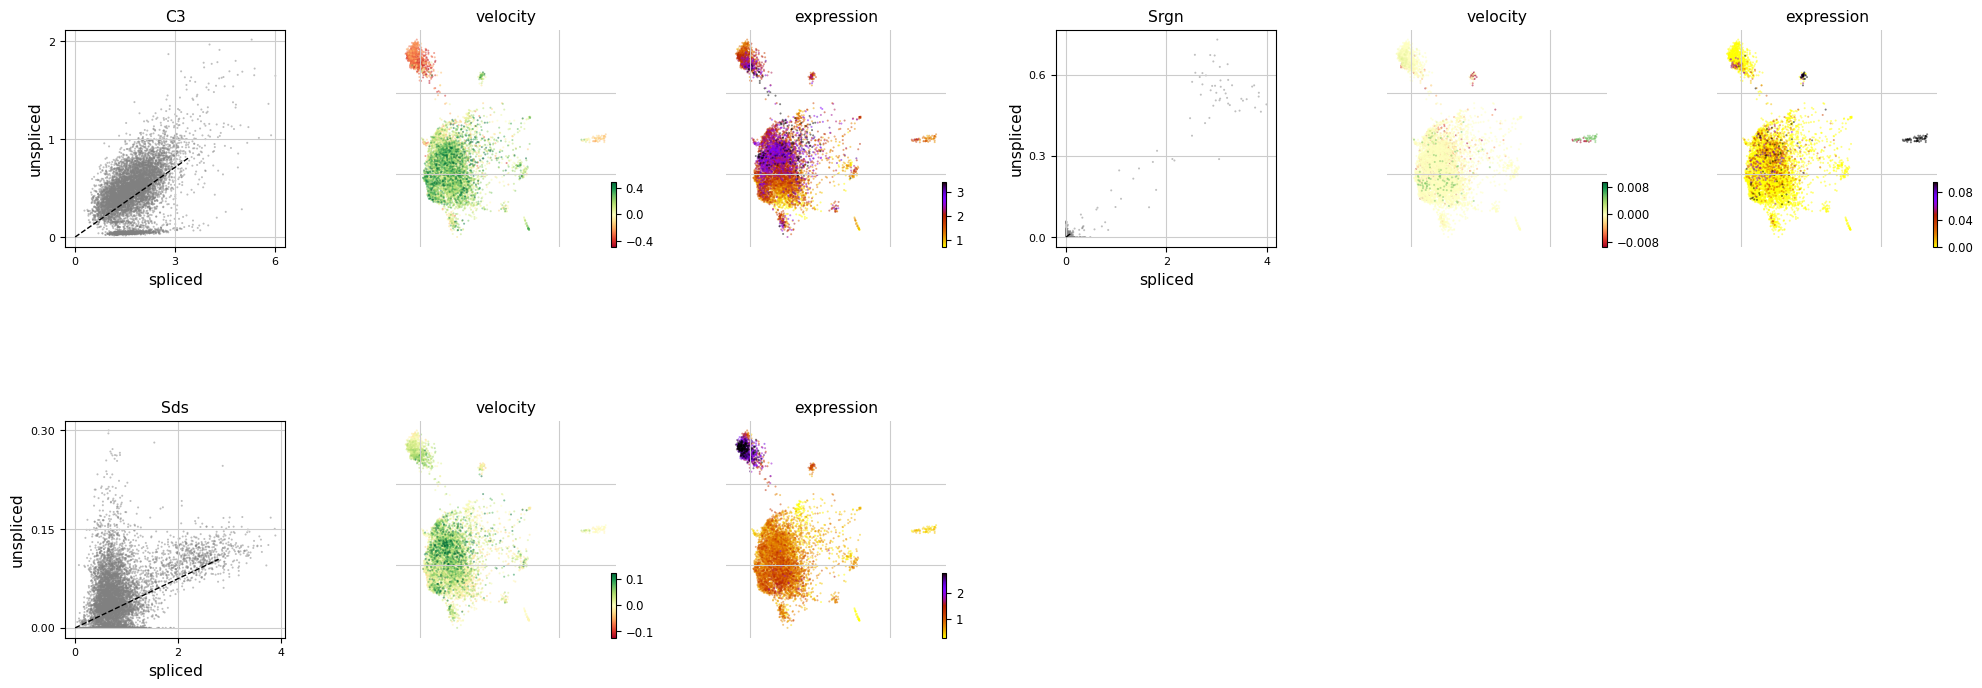

In [30]:
var_names=['C3','Srgn','Sds','Lyn','Tgfbi','Ctss']
scv.pl.velocity(adata3, var_names=var_names, colorbar=True, ncols=2)

TypeError: cannot perform reduce with flexible type

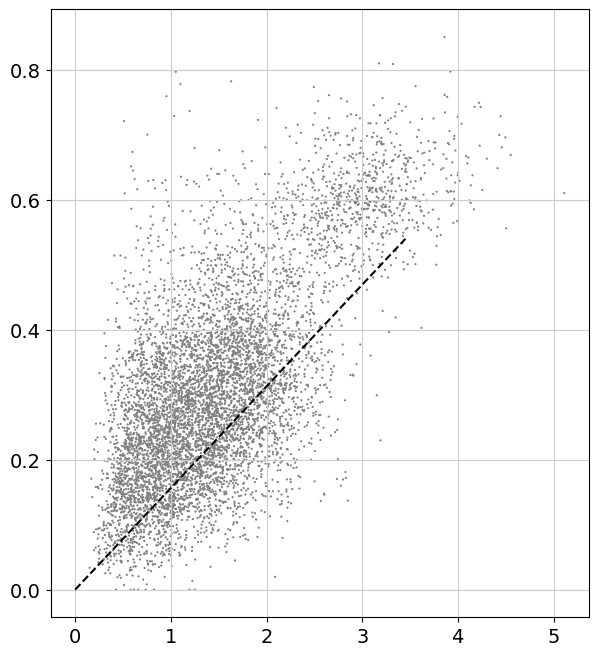

In [31]:
kwargs = dict(frameon=False, size=10, linewidth=1.5,
              add_outline='Hepatocyte, Macrophage')

scv.pl.scatter(adata3, df['Hepatocyte'][:5], ylabel='Hepatocyte', **kwargs)
scv.pl.scatter(adata3, df['Macrophage'][:5], ylabel='Macrophage', **kwargs)

In [ ]:
scv.settings.set_figure_params('scvelo') 

In [ ]:
var_names=['Grn']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2)

In [ ]:
var_names=['Egfr']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2 )

In [ ]:
var_names=['PLPP3']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2, save ='hcc_scvelo_PLPP3_endo_ss.pdf' )

In [ ]:
var_names=['TFF3']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2, save='hcc_scvelo_TFF3_endo_ss.pdf')

In [ ]:
var_names=['HLA-DRA']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2, save='hcc_scvelo_KDR_endo_ss.pdf')

In [ ]:
var_names=['FLT1']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2, save='hcc_scvelo_FLT1_endo_ss.pdf')

In [ ]:
scv.pl.scatter(adata, basis=['PLVAP', 'AFP'])

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', legend_fontsize=12, title='', smooth=.8, min_mass=4, save='scvelo_hcc_endo_dynamic.png')

In [ ]:
adata.write("C:/Users/seowjjw/Dropbox/Liver_Paper/Github/data/endo_73k.h5ad")
